In [ ]:
import sys
module_path = r"../src"
sys.oath.append(module_path)

import pandas as pd

/Users/tqh7876/Library/CloudStorage/OneDrive-Takeda/ActiveProjects/WearableSimulations/code/quantitative-sciences-nt1-detection-wearable-simulation


In [ ]:
# read data
df = pd.read_csv('path/to/dataframe.csv', low_memory=False)
df_tr = df.query("Group_wearable == 'train'").copy()


In [4]:
# Thresholds
# TODO - update the thresholds to reflect what you found in the threshold tuning notebook!
data = [
    {"five_n1w_to_two_r": 0, "rem_latency": 1,  "recall_at_99.5%_specificity": 0.4645},
    {"five_n1w_to_two_r": 1, "rem_latency": 8, "recall_at_99.5%_specificity": 0.5213},
    {"five_n1w_to_two_r": 2, "rem_latency": 24, "recall_at_99.5%_specificity": 0.4362},
    {"five_n1w_to_two_r": 3, "rem_latency": 42, "recall_at_99.5%_specificity": 0.3404},
    {"five_n1w_to_two_r": 4, "rem_latency": 82, "recall_at_99.5%_specificity": 0.2695},
    {"five_n1w_to_two_r": 5, "rem_latency": 10000, "recall_at_99.5%_specificity": 0.1879}
]
data = [
    {"five_n1w_to_two_r": 0, "rem_latency": 1,  "recall_at_99.5%_specificity": 0.4645},
    {"five_n1w_to_two_r": 1, "rem_latency": 7, "recall_at_99.5%_specificity": 0.5213},
    {"five_n1w_to_two_r": 2, "rem_latency": 22, "recall_at_99.5%_specificity": 0.4362},
    {"five_n1w_to_two_r": 3, "rem_latency": 41, "recall_at_99.5%_specificity": 0.3404},
    {"five_n1w_to_two_r": 4, "rem_latency": 80, "recall_at_99.5%_specificity": 0.2695},
    {"five_n1w_to_two_r": 5, "rem_latency": 10000, "recall_at_99.5%_specificity": 0.1879}
]

data = [
    {"five_n1w_to_two_r": 0, "rem_latency": 1,  "recall_at_99.5%_specificity": 0.4645},
    {"five_n1w_to_two_r": 1, "rem_latency": 7, "recall_at_99.5%_specificity": 0.5213},
    {"five_n1w_to_two_r": 2, "rem_latency": 22, "recall_at_99.5%_specificity": 0.4362},
    {"five_n1w_to_two_r": 3, "rem_latency": 40, "recall_at_99.5%_specificity": 0.3404},
    {"five_n1w_to_two_r": 4, "rem_latency": 1e6, "recall_at_99.5%_specificity": 0.2695},
    # {"five_n1w_to_two_r": 5, "rem_latency": 10000, "recall_at_99.5%_specificity": 0.1879}
]

# data = [
#     {"five_n1w_to_two_r": 0, "rem_latency": 0,  "recall_at_99.5%_specificity": 0.4645},
#     {"five_n1w_to_two_r": 1, "rem_latency": 15, "recall_at_99.5%_specificity": 0.5213},
#     {"five_n1w_to_two_r": 2, "rem_latency": 30, "recall_at_99.5%_specificity": 0.4362},
#     {"five_n1w_to_two_r": 3, "rem_latency": 60, "recall_at_99.5%_specificity": 0.3404},
#     {"five_n1w_to_two_r": 4, "rem_latency": 1e6, "recall_at_99.5%_specificity": 0.2695},
#     #{"five_n1w_to_two_r": 5, "rem_latency": 10000, "recall_at_99.5%_specificity": 0.1879}
#]

df_bests = pd.DataFrame(data)

# parameters
outer = 'five_n1w_to_two_r'
inner = 'rem_latency'

# save prediction
for i, row in df_bests.iterrows():
    df_best = row.to_dict()
    outer_best = int(df_best[outer])
    inner_best = int(df_best[inner])

    # apply threshold
    df[f"p-bin_{outer}={outer_best}"] = (df[outer] >= outer_best) & (df[inner] <= inner_best)


# Combined conditions
# -------------------
multi_condition = [
    'p-bin_five_n1w_to_two_r=0', 
    'p-bin_five_n1w_to_two_r=1', 
    'p-bin_five_n1w_to_two_r=2',
    'p-bin_five_n1w_to_two_r=3',
    'p-bin_five_n1w_to_two_r=4',
    #'p-bin_five_n1w_to_two_r=5'
]
best_condtition = ['p-bin_five_n1w_to_two_r=1']

# Apply row-wise logical OR across the selected columns
df['p-bin_multi-condition'] = df[multi_condition].any(axis=1)
df['p-bin_best-condition'] = df[best_condtition].any(axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20867 entries, 0 to 20866
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cohort                     20867 non-null  object 
 1   UNI-ID                     20867 non-null  object 
 2   Subject                    20867 non-null  object 
 3   Group_wearable             20867 non-null  object 
 4   Dx                         20867 non-null  object 
 5   age                        20662 non-null  float64
 6   sex                        20675 non-null  object 
 7   visit_number               20867 non-null  int64  
 8   n_visits_by_subject        20867 non-null  int64  
 9   sleep_latency              20867 non-null  float64
 10  total_sleep_time           20867 non-null  float64
 11  sleep_efficiency           20867 non-null  float64
 12  wake_after_sleep_onset     20867 non-null  float64
 13  wake_percentage            20867 non-null  flo

In [16]:
# new dicts
pred_dicts = [
    {
        'feature': 'soremp',
        'display': 'SOREMP\n(REML<15 min)',
    },
    #{
    #    'feature': 'p-bin_best-condition',
    #    'display': 'Best condition - REML & d-REM\n(Christensen et al. 2015)\nmax recall @ minSpe=99.5%',
    #},
    {
        'feature': 'p-bin_multi-condition',
        'display': 'Multiple conditions - REML & d-REM\n(Christensen et al. 2015)\nmax recall @ minSpe=99.5',
    }
]

# Confusion matrices

Index(['Cohort', 'UNI-ID', 'Subject', 'Group_wearable', 'Dx', 'age', 'sex',
       'visit_number', 'n_visits_by_subject', 'sleep_latency',
       'total_sleep_time', 'sleep_efficiency', 'wake_after_sleep_onset',
       'wake_percentage', 'n1_percentage', 'n2_percentage', 'n3_percentage',
       'rem_percentage', 'rem_latency', 'soremp', 'rCountR', 'soremC', 'wCum',
       'wBout', 'nFrag', 'five_n1w_to_two_r', 'rem_in_first_30_min',
       'rem_in_first_60_min', 'rem_in_first_120_min', 'Dx_idx',
       'p-bin_five_n1w_to_two_r=0', 'p-bin_five_n1w_to_two_r=1',
       'p-bin_five_n1w_to_two_r=2', 'p-bin_five_n1w_to_two_r=3',
       'p-bin_five_n1w_to_two_r=4', 'p-bin_multi-condition',
       'p-bin_best-condition'],
      dtype='object')


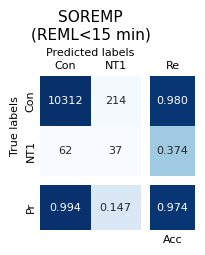

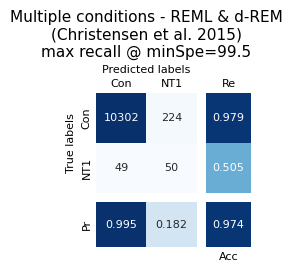

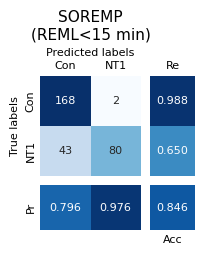

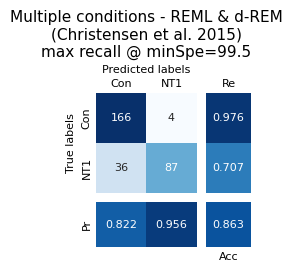

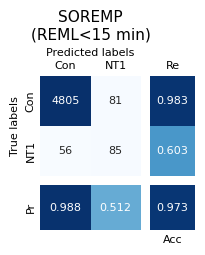

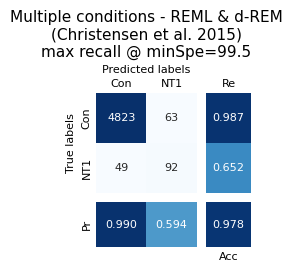

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from vis.confusion_matrix import plot_cm
from sklearn.metrics import confusion_matrix

# selected cohorts
#cohorts_incl = ['wsc', 'stages', 'cfs', 'chat', 'mesa', 'mros', 'shhs', 'cnc', 'dhc', 'fhc', 'ihc', 'khc', 'ssc', '994-0001', '994-1501']
cohorts_incl = ['wsc', 'stages', 'cfs', 'chat', 'mesa', 'mros', 'shhs', 'cnc', 'dhc', 'fhc', 'ihc', 'khc', 'ssc', '861-2001']
df_selected = df[df['Cohort'].isin(cohorts_incl)].copy()
print(df.columns)


for split in [['train'], ['test'], ['test_multivisits', 'test']]:
    for pred_dict in pred_dicts:
    
        # select data
        df_split = df_selected[df_selected['Group_wearable'].isin(split) & (df_selected['visit_number'] == 1)]
        # ].query(f"(Group_wearable in @split) & (visit_number == 1))").copy()

        # extract features and thresholds
        y_true = df_split['Dx_idx'].values
        y_pred = np.array(df_split[pred_dict['feature']].values, dtype=float)
        
        # remove NANs
        nan_mask = np.isnan(y_pred)
        y_true_valid = y_true[~nan_mask]
        y_pred_valid = y_pred[~nan_mask]
        
        # print
        # print(f"{split} {pred_dict['display']}: {y_pred_bin.sum()} of {y_pred_bin.shape[0]}")

        # build cm
        cm = confusion_matrix(y_true_valid, y_pred_valid)
        
        # plot confusion matrix
        plot_cm(cm, events=['Con', 'NT1'], title=f"{pred_dict['display']}", marginals=True, decimals=0, figsize=(2., 2.), fontsize=8)
        

# Test-retest

In [20]:
# 1) plot confusion matrix (results)
# 2) plot test-retest results - maybe just as a table ?! 
df_selected[['Dx', 'Group_wearable']].value_counts().sort_index()

Dx       Group_wearable  
NT1      test                  123
         test_multivisits       56
         train                  99
control  test                  170
         test_multivisits     9839
         train               10526
Name: count, dtype: int64

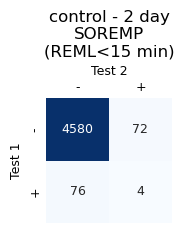

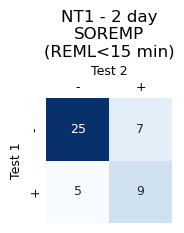

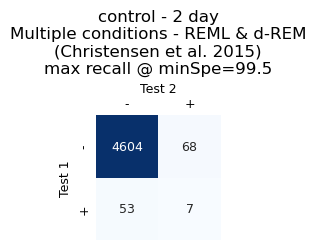

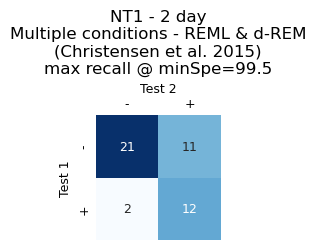

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from vis.confusion_matrix import plot_cm
from sklearn.metrics import confusion_matrix

# Multi-night conditinoal data
datasets = ['861-2001', '994-0001', '994-1501']
datasets = ['861-2001', '994-1501']
#datasets = ['994-0001', '994-1501']
#groups = ['train', 'test', 'test_multivisit']
groups = ['test_multivisits']
Dxs = ['control', 'NT1']


for pred_dict in pred_dicts:
    for group in groups:
        for Dx in Dxs: 
            
            # pivot
            # df_ = df.query("(Group_wearable == @group) & (Dx == @Dx) & (dataset in @datasets)")
            df_ = df.query("(Group_wearable == @group) & (Dx == @Dx)")
            df_pivot = df_.pivot(index=['Subject', 'Dx'], columns='visit_number', values=pred_dict['feature'])
            
            df_pivot = df_pivot.reset_index()
            
            # get data
            y_1 = np.bool(df_pivot[1].values)
            y_2 = np.bool(df_pivot[2].values)
            # y_3 = np.bool(df_pivot['PSG03'].values)

            # build cm
            cm = confusion_matrix(y_1, y_2)
            
            # plot confusion matrix
            title=f"{Dx} - 2 day\n{pred_dict['display']}"

            plot_cm(cm, events=['-', '+'],
                    marginals=False, decimals=0, decimals_marg=3,
                    title=title, xlabel='Test 2', ylabel='Test 1', 
                    figsize=(2.5, 2.5), fontsize=9)
                    